# STA 208: Homework 2
This is based on the material in Chapters 3, 4.4 of 'Elements of Statistical Learning' (ESL), in addition to lectures 4-6.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

# 1. Conceptual Exercises

__Exercise 1.1.__ (5 pts) Ex. 3.29 in ESL 

Firstly, we set variable $X$ as $N\times 1$ $\begin{bmatrix}.\\ x\\ .\end{bmatrix}_{N \times 1}$. Then according to formula of Rigde regression we know

$$\beta ^{ridge}=[X^TX+\lambda I]^{-1}X^TY$$

$$\alpha = \frac{X^TY}{X^TX+\lambda I}$$

let $Z=X^TX$, so we got $\alpha = \frac{X^TY}{Z+\lambda I}$, after that, we include exact copy $X^*=X$ and get new variable $X_{new}=[X,X]_{n \times 2}$. Then we refit ridge regression:

$$\begin{align*}
\beta ^{ridge}_{new} &= \left [ \begin{bmatrix}X^T\\X^T \end{bmatrix}[X X]+\lambda I_2 \right ]^{-1}\begin{bmatrix}X^T\\X^T \end{bmatrix}Y\\
& = \left [ \begin{bmatrix} X^TX & X^TX\\ X^TX& X^TX\end{bmatrix}+\lambda I_2 \right ]^{-1}\begin{bmatrix}X^TY\\X^TY \end{bmatrix}\\
& =  \begin{bmatrix} Z+\lambda I& Z\\ Z& Z+\lambda I\end{bmatrix}^{-1}\begin{bmatrix}X^TY\\X^TY \end{bmatrix}\\
& = \frac{1}{\left \|(Z+\lambda I)^T(Z+\lambda I)-Z^TZ  \right \|}\begin{bmatrix} Z+\lambda I& -Z\\ -Z& Z+\lambda I\end{bmatrix}^{-1}\begin{bmatrix}X^TY\\X^TY \end{bmatrix}\\
& = \frac{1}{\left \|(2\lambda Z+\lambda ^2I \right \|}\begin{bmatrix} Z+\lambda I& -Z\\ -Z& Z+\lambda I\end{bmatrix}^{-1}\begin{bmatrix}X^TY\\X^TY \end{bmatrix}\\
& = \frac{1}{\left \|(2\lambda Z+\lambda ^2I \right \|}\begin{bmatrix}X^TY \lambda\\X^TY\lambda \end{bmatrix}\\
\end{align*}$$

Accordingly, we prove that both coefficients are identical, which is $\frac{X^TY \lambda}{\left \|(2\lambda Z+\lambda ^2I \right \|}$

Now, when consider there are m copies of variable $X_j$ we got new variable $X_{new}=[X_1,...,X_i,X_j,...,X]_{n \times M}$, then for every $i,j \in 1,2,...,m$ $X_i=X_j$ and $j\neq i$, the coefficient should be $[\beta_1,...,\beta_i,\beta_j,...,\beta_m]$, because each variable is the same, when we change the order, for example, exchange $X_i$ and $X_j$, the coefficient we get will be identical, which means $[\beta_1,...,\beta_i,\beta_j,...,\beta_m]=[\beta_1,...,\beta_j,\beta_i,...,\beta_m]$, which means that $\beta_j=\beta_i$. What's more we can also exchange other variables which will give us same answer. Above all, in general that if m copies of a variable $X_j$ are
included in a ridge regression, their coefficients are all the same.

__Exercise 1.2__ (5 pts) Ex. 3.30 in ESL

Firstly, we let variables $X y$ denote Elastic Net, and use variable $X' y'$ denote Lasso. Then we augment $X y$.

$$X'=\begin{pmatrix}X \\ \sqrt{\lambda I_p} \end{pmatrix}     y'=\begin{pmatrix}y \\ 0\end{pmatrix}$$

Then we use the formula of Lasso

$$\begin{align*}
\hat\beta&= \text{argmin}_{\beta}\left(\left \|y'-X'\beta\right \|^2+\gamma \left \| \beta \right \|_1 \right)\\
& = \text{argmin}_{\beta}\left((y'-X'\beta)^T(y'-X'\beta)+\gamma \left \| \beta \right \|_1\right)\\
& = \text{argmin}_{\beta}\left(y'^Ty'-2\beta X'^Ty'+\beta X'^TX'\beta+\gamma \left \| \beta \right \|_1\right)
\end{align*}$$

In order to solve this equation we divide it into three smaller equations.

$$y'^Ty'= (y^T 0)\begin{pmatrix}y \\ 0\end{pmatrix}=y^Ty$$

$$\beta^TX^Ty' = \beta^T(X^T \sqrt{\lambda I_p})\begin{pmatrix}y \\ 0\end{pmatrix}=\beta^TX^Ty$$

$$\begin{align*}
\beta^TX'^TX'\beta& = \beta^T(X^T \sqrt{\lambda I_p})\begin{pmatrix}X \\ \sqrt{\lambda I_p}\end{pmatrix}\beta\\
&=\beta^T(X^TX+\lambda I_p)\beta\\
&=\beta^TX^TX\beta+\lambda \beta^T\beta
\end{align*}$$

Combine previous three we can calculate original function

$$\begin{align*}
\hat\beta&= \text{argmin}_{\beta}\left(y'^Ty'-2\beta X'^Ty'+\beta X'^TX'\beta+\gamma \left \| \beta \right \|_1\right)\\
&=\text{argmin}_{\beta}\left((y-X\beta)^T(y-X\beta)+\lambda \left \| \beta \right \|_2^2+\gamma\left \| \beta \right \|_1\right)\\
&=\text{argmin}_{\beta}\left((y-X\beta)^T(y-X\beta)+\tilde{\lambda}\left(\alpha \left \| \beta \right \|_2^2+(1-\alpha)\left \| \beta \right \|_1\right)\right)\\
\end{align*}$$

where $\lambda=\tilde{\lambda}\alpha$ and $\gamma = \tilde{\lambda}(1-\alpha)$, accordingly we find that elastic-net optimization problem can be turned into a lasso problem, using an augmented version of $X$ and $y$.

__Exercise 1.3__ (5 pts) $Y \in \{0,1\}$ follows an exponential family model with natural parameter $\eta$ if
$$P(Y=y) = \exp\left( y \eta - \psi(\eta) \right).$$
Show that when $\eta = x^\top \beta$ then $Y$ follows a logistic regression model.

Since $Y \in \{0,1\}$, so we can view it as classification problem, and $Y|X$ is Binomial, since the logistic model assumes that 

$$\text{log}\frac{\mathbb{P}\{Y=1|X=x\}}{\mathbb{P}\{Y=0|X=x\}}=x^T\beta$$

so we can use this as criteria to find out whether this is logistic model. We can use the fact condition $\eta = x^\top \beta$.

$$\mathbb{P}\{Y=0|X=x\}=\exp\left( 0\times x^T \beta - \psi(x^T \beta) \right)=\exp\left(- \psi(x^T \beta)\right)$$

$$\mathbb{P}\{Y=1|X=x\}=\exp\left( 1\times x^T \beta - \psi(x^T \beta) \right)=\exp\left(x^T \beta\right)\times\exp\left(- \psi(x^T \beta)\right)$$

Then we put those two into original function to calculate.

$$\text{log}\frac{\mathbb{P}\{Y=1|X=x\}}{\mathbb{P}\{Y=0|X=x\}}=\text{log}\frac{\exp\left(x^T \beta\right)\times\exp\left(- \psi(x^T \beta)\right)}{\exp\left(- \psi(x^T \beta)\right)}=x^T\beta$$

Accordingly, we show that if $\eta = x^\top \beta$ then $Y$ follows a logistic regression model.

# 2. Data Analysis

In [6]:
import numpy as np
import pandas as pd

# dataset path
data_dir = "."

Load the following medical dataset with 750 patients. The response variable is survival dates (Y), the predictors are 104 measurements measured at a specific time (numerical variables have been standardized).

In [7]:
sample_data = pd.read_csv(data_dir+"/hw2.csv", delimiter=',')

In [8]:
sample_data.head()

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104
0,1498,No,0.171838,-0.081764,-1.448868,-1.302547,-0.143061,-0.339784,-1.206475,0.444493,...,-1.379066,0.420436,-0.827446,0.318695,-0.787409,0.351406,-0.836107,0.015502,0.435444,-0.879906
1,334,Yes,-0.605767,-0.584360,-0.485169,-0.848111,-0.493546,-0.392332,-0.239788,0.421697,...,0.398840,-0.434789,-0.698862,1.387219,0.948456,0.191397,1.451699,-1.243616,-0.699072,1.751434
2,845,Yes,-0.266330,-0.126965,0.138401,0.262732,-0.202438,0.397194,0.137790,0.047847,...,-0.450999,-0.627830,0.677158,-0.140255,-0.798641,-0.972419,-0.852035,0.080914,-1.906252,0.705509
3,1484,No,0.113498,0.893293,-0.825298,-0.444168,0.756242,0.179122,-1.145078,-1.471261,...,0.316312,0.131010,0.878134,-0.306249,-1.263270,1.316120,-0.999717,1.104161,-0.234038,-0.083488
4,301,Yes,-0.620454,-0.608036,-0.088352,0.111253,-0.598898,-0.513191,0.753000,1.055418,...,0.364884,0.251667,0.373787,-0.354599,0.085019,1.207509,-0.762206,-0.067318,0.158247,0.592638


In [9]:
sample_data.V1 = sample_data.V1.eq('Yes').mul(1)

The response variable is Y for 2.1-2.3 and Z for 2.4. 

In [10]:
X = np.array(sample_data.iloc[:,range(2,104)])
y = np.array(sample_data.iloc[:,0])
z = np.array(sample_data.iloc[:,1])

__Exercise 2.1__ (10 pts) Perform ridge regression on the method and cross-validate to find the best ridge parameter.

The plot shows that using Leave-one-out method the lower the lambda the lower the risk, the lowest one is the lowest boundary I got. Accordingly, the ridge regression for this dataset does not perform better than OLS. But there are right answer when we use 10-fold cross validation which give us best parameter 3.45, and lasso give us 21.19 with 10-fold.

In [12]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge,lars_path, RidgeCV, Lasso, LassoCV,lasso_path
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

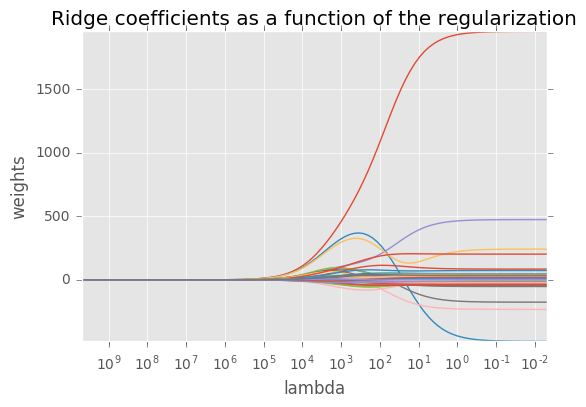

In [7]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [8]:
alphas = np.linspace(100,0.05,1000)
rcv = RidgeCV(alphas = alphas, store_cv_values=True,normalize=False)
# RidgeCV performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation
rcv.fit(X,y)
cv_vals = rcv.cv_values_
LOOr = cv_vals.mean(axis=0)

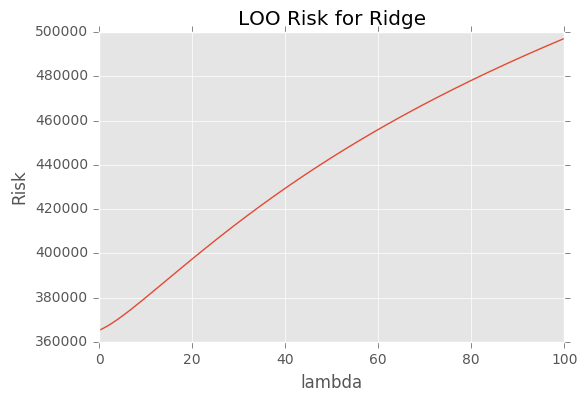

In [9]:
plt.plot(alphas,LOOr)
plt.xlabel('lambda')
plt.ylabel('Risk')
plt.title('LOO Risk for Ridge');
plt.show()

In [10]:
LOOr[-1]

365349.425700452

In [12]:
r10cv = RidgeCV(alphas = alphas, cv = 10,normalize=False)
r10cv.fit(X,y)
r10cv.alpha_

3.4517017017017082

__Exercise 2.2__ (10 pts) Plot the lasso and lars path for each of the coefficients.  All coefficients for a given method should be on the same plot, you should get 2 plots.  What are the major differences, if any?  Are there any 'leaving' events in the lasso path?

We can find out most of the coefficents go to zero quickly, so they are not important, and there is no apparent difference between lasso and lars path for each of the coefficients. In addition, there is no leaving event happened in lasso path, but the leaving event happened at parameter 'V35' in lar path. 

In [13]:
lasso = lasso_path(X,y)

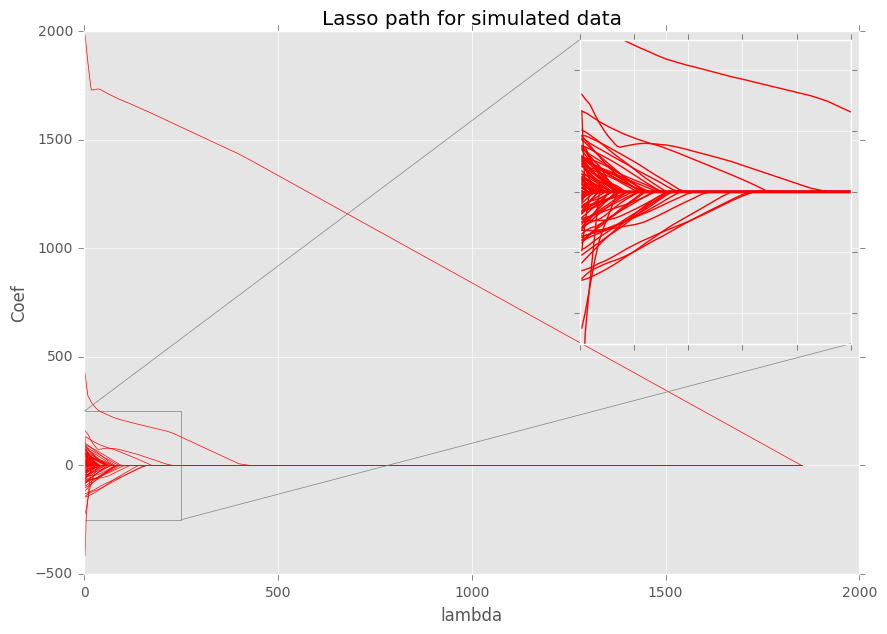

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
lasso = lasso_path(X,y)
fig, ax = plt.subplots(figsize=(10,7))
for j in range(102):
    ax.plot(lasso[0],lasso[1][j,:],'r',linewidth=.5)
plt.title('Lasso path for simulated data')
plt.xlabel('lambda')
plt.ylabel('Coef')

axins = zoomed_inset_axes(ax, 2.8, loc=1)
for j in range(102):
    axins.plot(lasso[0],lasso[1][j,:],'r')
x1, x2, y1, y2 = 0, 250, -250, 250 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

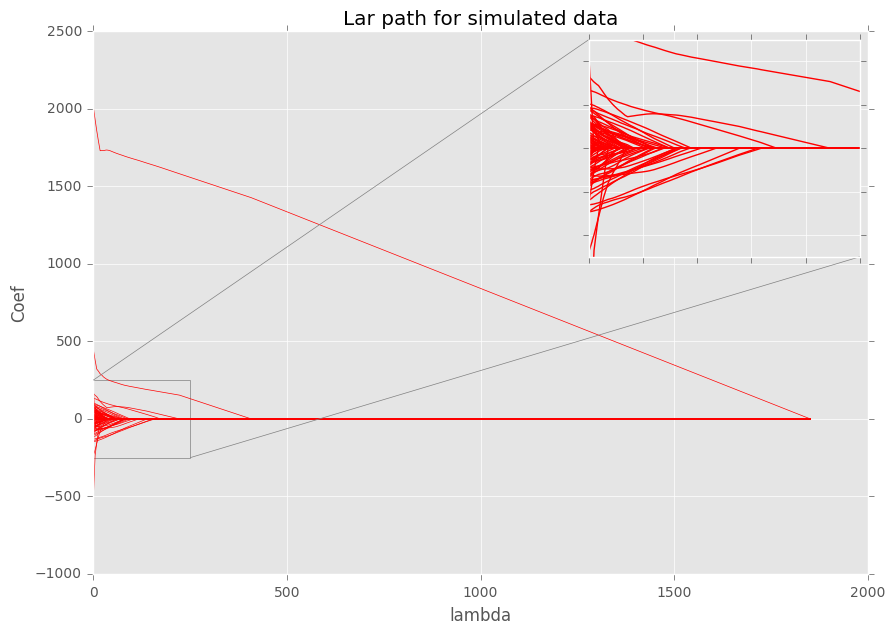

In [25]:
lar = lars_path(X,y,method="lar")
fig, ax = plt.subplots(figsize=(10,7))
for j in range(102):
    ax.plot(lar[0],lar[2][j,:],'r',linewidth=.5)
plt.title('Lar path for simulated data')
plt.xlabel('lambda')
plt.ylabel('Coef')

axins = zoomed_inset_axes(ax, 2.8, loc=1)
for j in range(102):
    axins.plot(lar[0],lar[2][j,:],'r')
x1, x2, y1, y2 = 0, 250, -250, 250 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

In [29]:
leave_para=[]
coeff = []
for i in range(len(lar[2])):
    z,x=-2,-2
    for j in lar[2][i]:
        if j > 0:
            z=1
        if j<0:
            x=-1
        if z+x==0:
            leave_para.append('V'+str(i+2))
            coeff.append(lar[2][i])
print set(leave_para)
print  coeff[0]

set(['V35'])
[  0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.      

In [30]:
leave_para=[]
coeff = []
for i in range(len(lasso[1])):
    z,x=-2,-2
    for j in lasso[1][i]:
        if j > 0:
            z=1
        if j<0:
            x=-1
        if z+x==0:
            leave_para.append('V'+str(i+2))
            coeff.append(lasso[1][i])
print set(leave_para)
print  coeff

set([])
[]


__Exercise 2.3__ (10 pts) Cross-validate the Lasso and compare the results to the answer to 2.1.

We can find out that by using leave-one-out method the best lambda is 19.77, and the mse is 344419. This method perform better than ridge regression, which have risk 365349. When using 10-fold cross validation will give us best parameter 3.45, and lasso give us 21.19.

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
looiter = loo.split(X)
hitlasso = LassoCV(cv=looiter)
hitlasso.fit(X,y)
print("The selected lambda value is {:.2f}".format(hitlasso.alpha_))

The selected lambda value is 19.77


In [32]:
hitlasso.coef_

array([  1.73051230e+03,  -0.00000000e+00,   2.48154383e+02,
        -0.00000000e+00,   0.00000000e+00,   2.03920020e+00,
        -1.12770935e+02,   4.99403898e+01,   0.00000000e+00,
         0.00000000e+00,  -1.24214231e+01,  -1.31887670e+00,
         2.36642863e+00,  -7.17573893e+00,   1.52729999e+02,
         1.55019905e+01,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -8.08705517e+00,  -0.00000000e+00,
         0.00000000e+00,   3.74703385e+01,  -7.14540755e+00,
        -7.44704082e+00,  -4.93827409e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   5.49144677e+00,   6.66161550e+00,
         0.00000000e+00,   7.49429215e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.08281463e+01,
         0.00000000e+00,   9.02076521e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -1.24477637e+01,
        -0.00000000e+00,   1.06641098e+01,   1.15205085e+01,
         1.14065964e+01,

In [33]:
np.mean(hitlasso.mse_path_[hitlasso.alphas_ == hitlasso.alpha_])

344419.46343420137

In [34]:
la10 = LassoCV(cv=10)
la10.fit(X,y)
la10.alpha_

21.194968599924049

__Exercise 2.4__ (15 pts) Obtain the 'best' active set from 2.3, and create a new design matrix with only these variables.  Use this to predict the categorical variable $z$ with logistic regression. 

By using the active set from 2.3, I predict the category with logistic regression, and the accuracy rate is 93 percent. 

In [14]:
filted_index = np.where(hitlasso.coef_ != 0)[0]
filted_X = X[:,filted_index]
filted_X.shape

(750L, 36L)

In [15]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(filted_X, z)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logis.coef_

array([[ -1.65170840e+00,   1.18502892e-01,  -3.23150506e-01,
          2.38727902e+00,   4.44393561e-01,  -8.95756578e-01,
         -5.09094290e-01,  -3.62065321e-01,   7.27389049e-01,
          6.43487483e-01,   4.70528636e-02,  -5.10831038e-02,
          5.69260932e-02,  -1.39742127e-01,   2.63841649e-02,
          2.53733982e-02,  -5.98213548e-02,   2.51311076e-02,
          1.24163083e-01,  -3.01428091e-02,   4.45901898e-02,
          5.79879760e-02,   2.14099019e-01,  -1.68187912e-02,
         -1.12737352e-02,  -1.95051182e-01,  -7.38129064e-03,
          4.54263668e-02,  -1.41064004e-03,   1.75529652e-01,
         -4.58254529e-02,   1.27945990e-01,   5.23249732e-02,
         -1.38500021e-01,   2.45143613e-02,   9.52757517e-03]])

In [69]:
logis.score(filted_X, z)

0.93866666666666665

In [75]:
print 'active set'
active = ['V'+str(i+2) for i in filted_index]
active

active set


['V2',
 'V4',
 'V7',
 'V8',
 'V9',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V21',
 'V24',
 'V25',
 'V26',
 'V27',
 'V33',
 'V34',
 'V36',
 'V40',
 'V42',
 'V46',
 'V48',
 'V49',
 'V50',
 'V56',
 'V61',
 'V63',
 'V65',
 'V66',
 'V72',
 'V82',
 'V83',
 'V85',
 'V86',
 'V103']